# Scrapping Amazon Reviews

In [1]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [4]:
#creating a loop from 1 to 100 reviews pages of the product
for x in range(1,100):
    soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
170
Getting page: 19
180
Getting page: 20
190
Getting page: 21
200
Getting page: 22
210
Getting page: 23
220
Getting page: 24
230
Getting page: 25
240
Getting page: 26
250
Getting page: 27
260
Getting page: 28
270
Getting page: 29
280
Getting page: 30
290
Getting page: 31
300
Getting page: 32
310
Getting page: 33
320
Getting page: 34
330
Getting page: 35
340
Getting page: 36
350
Getting page: 37
360
Getting page: 38
370
Getting page: 39
380
Getting page: 40
390
Getting page: 41
400
Getting page: 42
410
Getting page: 43
420
Getting page: 44
430
Getting page: 45
440
Getting page: 46
450
Getting page: 47
460
Getting page: 48
470
Getting pa

In [5]:
#creating dataframe of the list 
df = pd.DataFrame(reviewlist)
df

title  rating  \
0               I am very happy to buy this product...     5.0   
1                                     Amazingly Amazon     4.0   
2                                            base king     4.0   
3              The head phone plastic band broken out.     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
..                                                 ...     ...   
935                                       Good product     5.0   
936                                       It's amazing     4.0   
937                                       Worth to buy     5.0   
938                                       Disappointed     4.0   
939                मजा आ गया bhojpuri gana sun ke.....     3.0   

                                               content  
0                                  Nice product...👍👍..  
1    It says 8 hrs but since I use this to watch le...  
2    the base is really good. it a value for this r...  
3    This product was had manufacturing defect insi...  
4    Edit: After 1 year of usage.The headphone star...  
..                                                 ...  
935  It's. Good product and working as per the desc...  
936   The sound quality is superb, worth for the cost.  
937                   Working like beast. Nice product  
938  Sound is lagging. Not a good product. Very dis...  
939  The media could not be loaded.\n              ...  

[940 rows x 3 columns]

In [6]:
df.shape

(940, 3)

In [7]:
df['content'].unique

<bound method Series.unique of 0                                    Nice product...👍👍..
1      It says 8 hrs but since I use this to watch le...
2      the base is really good. it a value for this r...
3      This product was had manufacturing defect insi...
4      Edit: After 1 year of usage.The headphone star...
                             ...                        
935    It's. Good product and working as per the desc...
936     The sound quality is superb, worth for the cost.
937                     Working like beast. Nice product
938    Sound is lagging. Not a good product. Very dis...
939    The media could not be loaded.\n              ...
Name: content, Length: 940, dtype: object>

In [8]:
#combining two columns title and content to make a new column called reviews 
df["reviews"] = df["title"]+df["content"]
df.head()

title  rating  \
0             I am very happy to buy this product...     5.0   
1                                   Amazingly Amazon     4.0   
2                                          base king     4.0   
3            The head phone plastic band broken out.     1.0   
4  Cheap Plastic, Average product.  Sound is dist...     2.0   

                                             content  \
0                                Nice product...👍👍..   
1  It says 8 hrs but since I use this to watch le...   
2  the base is really good. it a value for this r...   
3  This product was had manufacturing defect insi...   
4  Edit: After 1 year of usage.The headphone star...   

                                             reviews  
0  I am very happy to buy this product...Nice pro...  
1  Amazingly AmazonIt says 8 hrs but since I use ...  
2  base kingthe base is really good. it a value f...  
3  The head phone plastic band broken out.This pr...  
4  Cheap Plastic, Average product.  Sound is dist...

In [9]:
#instead of droping the columns we can access the columns we need in further process by iloc 
amazon = df.iloc[:,[1,3]]
amazon

rating                                            reviews
0       5.0  I am very happy to buy this product...Nice pro...
1       4.0  Amazingly AmazonIt says 8 hrs but since I use ...
2       4.0  base kingthe base is really good. it a value f...
3       1.0  The head phone plastic band broken out.This pr...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
935     5.0  Good productIt's. Good product and working as ...
936     4.0  It's amazingThe sound quality is superb, worth...
937     5.0       Worth to buyWorking like beast. Nice product
938     4.0  DisappointedSound is lagging. Not a good produ...
939     3.0  मजा आ गया bhojpuri gana sun ke.....The media c...

[940 rows x 2 columns]

In [10]:
#now we have more information in less columns 

# Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format. 

It is also an important step in data mining as we cannot work with raw data. 

The quality of the data should be checked before applying machine learning or data mining algorithms

In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   940 non-null    float64
 1   reviews  940 non-null    object 
dtypes: float64(1), object(1)
memory usage: 14.8+ KB


In [12]:
#checking null values  
amazon.isnull().sum()

rating     0
reviews    0
dtype: int64

In [13]:
amazon.describe()

rating
count  940.000000
mean     3.311702
std      1.576475
min      1.000000
25%      2.000000
50%      4.000000
75%      5.000000
max      5.000000

In [14]:
#counts of every rating 
amazon['rating'].value_counts()

5.0    317
1.0    222
4.0    186
3.0    132
2.0     83
Name: rating, dtype: int64

In [15]:
# df_value_counts =pd.DataFrame()
# lst = amazon['rating'].unique()  
# dframe = pd.DataFrame(lst)  
# nd= amazon['rating'].value_counts()
# dframes= pd.DataFrame(nd)
ratings_count = {'Rating': amazon['rating'].unique(), 'Rating count': amazon['rating'].value_counts()}  
rating_count= pd.DataFrame(ratings_count)
rating_count

Rating  Rating count
5.0     5.0           317
1.0     4.0           222
4.0     1.0           186
3.0     2.0           132
2.0     3.0            83

# Visualizations for Ratings

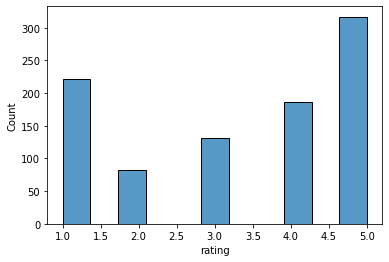

In [16]:
sns.histplot(amazon['rating'])
plt.show()

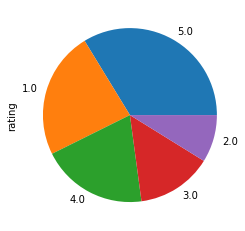

In [17]:
amazon.rating.value_counts().plot(kind='pie')
plt.show()

# Text Preprocessing

In [18]:
#to analyze the data we are a replicating the dataframe as amazon to store more columns but it won't distrub the main dataset
amazon_analysis = amazon.copy()

In [19]:
#Number of characters in single tweet
amazon_analysis['char_count'] = amazon_analysis['reviews'].str.len() ## this also includes spaces
amazon_analysis[['reviews','char_count']]

reviews  char_count
0    I am very happy to buy this product...Nice pro...          57
1    Amazingly AmazonIt says 8 hrs but since I use ...         237
2    base kingthe base is really good. it a value f...         124
3    The head phone plastic band broken out.This pr...         525
4    Cheap Plastic, Average product.  Sound is dist...        2216
..                                                 ...         ...
935  Good productIt's. Good product and working as ...         104
936  It's amazingThe sound quality is superb, worth...          60
937       Worth to buyWorking like beast. Nice product          44
938  DisappointedSound is lagging. Not a good produ...         111
939  मजा आ गया bhojpuri gana sun ke.....The media c...         141

[940 rows x 2 columns]

In [20]:
#count of special charaters in the text  
amazon_analysis['punctuations'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]')]))
amazon_analysis[['reviews','punctuations']]

reviews  punctuations
0    I am very happy to buy this product...Nice pro...             0
1    Amazingly AmazonIt says 8 hrs but since I use ...             0
2    base kingthe base is really good. it a value f...             0
3    The head phone plastic band broken out.This pr...             0
4    Cheap Plastic, Average product.  Sound is dist...             0
..                                                 ...           ...
935  Good productIt's. Good product and working as ...             0
936  It's amazingThe sound quality is superb, worth...             0
937       Worth to buyWorking like beast. Nice product             0
938  DisappointedSound is lagging. Not a good produ...             0
939  मजा आ गया bhojpuri gana sun ke.....The media c...             0

[940 rows x 2 columns]

In [21]:
#number of numericals present in each row
amazon_analysis['numerics'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
amazon_analysis[['reviews','numerics']]

reviews  numerics
0    I am very happy to buy this product...Nice pro...         0
1    Amazingly AmazonIt says 8 hrs but since I use ...         2
2    base kingthe base is really good. it a value f...         0
3    The head phone plastic band broken out.This pr...         1
4    Cheap Plastic, Average product.  Sound is dist...         4
..                                                 ...       ...
935  Good productIt's. Good product and working as ...         1
936  It's amazingThe sound quality is superb, worth...         0
937       Worth to buyWorking like beast. Nice product         0
938  DisappointedSound is lagging. Not a good produ...         0
939  मजा आ गया bhojpuri gana sun ke.....The media c...         0

[940 rows x 2 columns]

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [24]:
#number of stopwords in each tweet
stop = stopwords.words('english')

amazon_analysis['stopwords'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
amazon_analysis[['reviews','stopwords']]

reviews  stopwords
0    I am very happy to buy this product...Nice pro...          4
1    Amazingly AmazonIt says 8 hrs but since I use ...         13
2    base kingthe base is really good. it a value f...         11
3    The head phone plastic band broken out.This pr...         33
4    Cheap Plastic, Average product.  Sound is dist...        128
..                                                 ...        ...
935  Good productIt's. Good product and working as ...          6
936  It's amazingThe sound quality is superb, worth...          3
937       Worth to buyWorking like beast. Nice product          1
938  DisappointedSound is lagging. Not a good produ...          5
939  मजा आ गया bhojpuri gana sun ke.....The media c...          3

[940 rows x 2 columns]

### Removing Stopwords

In [25]:
#removing all the stopwords in the column 
stop = stopwords.words('english')
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon['reviews']

<ipython-input-25-c4d734e2072a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0              I happy buy product...Nice product...👍👍..
1      Amazingly AmazonIt says 8 hrs since I use watc...
2      base kingthe base really good. value range mon...
3      The head phone plastic band broken out.This pr...
4      Cheap Plastic, Average product. Sound distorte...
                             ...                        
935    Good productIt's. Good product working per des...
936    It's amazingThe sound quality superb, worth cost.
937            Worth buyWorking like beast. Nice product
938    DisappointedSound lagging. Not good product. V...
939    मजा आ गया bhojpuri gana sun ke.....The media c...
Name: reviews, Length: 940, dtype: object

In [26]:
amazon['reviews'].isnull().sum()

0

In [27]:
#converting all the upper case and sentence case in lower case 
amazon = amazon.apply(lambda x: x.astype(str).str.lower())

In [28]:
#converted in lower case
amazon.head()

rating                                            reviews
0    5.0          i happy buy product...nice product...👍👍..
1    4.0  amazingly amazonit says 8 hrs since i use watc...
2    4.0  base kingthe base really good. value range mon...
3    1.0  the head phone plastic band broken out.this pr...
4    2.0  cheap plastic, average product. sound distorte...

In [29]:
#rare words counts
freq = pd.Series(' '.join(amazon['reviews']).split()).value_counts()[-10:]
freq

pricier          1
exercising       1
volume.honest    1
pastic           1
kudos            1
itbest           1
occasionally,    1
one.rest         1
only..i          1
buyeverything    1
dtype: int64

In [30]:
#rare words removal
freq = list(freq.index)
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
amazon['reviews'].head()

0            i happy buy product...nice product...👍👍..
1    amazingly amazonit says 8 hrs since i use watc...
2    base kingthe base really good. value range mon...
3    the head phone plastic band broken out.this pr...
4    cheap plastic, average product. sound distorte...
Name: reviews, dtype: object

In [31]:
amazon

rating                                            reviews
0      5.0          i happy buy product...nice product...👍👍..
1      4.0  amazingly amazonit says 8 hrs since i use watc...
2      4.0  base kingthe base really good. value range mon...
3      1.0  the head phone plastic band broken out.this pr...
4      2.0  cheap plastic, average product. sound distorte...
..     ...                                                ...
935    5.0  good productit's. good product working per des...
936    4.0  it's amazingthe sound quality superb, worth cost.
937    5.0          worth buyworking like beast. nice product
938    4.0  disappointedsound lagging. not good product. v...
939    3.0  मजा आ गया bhojpuri gana sun ke.....the media c...

[940 rows x 2 columns]

In [32]:
amazon['reviews'].isnull().sum()

0

In [33]:
import re

In [34]:
#removing all the emojis present in the text 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
amazon['reviews'] = amazon['reviews'].apply(lambda x: remove_emoji(x))


In [35]:
amazon['reviews'] 

0                i happy buy product...nice product.....
1      amazingly amazonit says 8 hrs since i use watc...
2      base kingthe base really good. value range mon...
3      the head phone plastic band broken out.this pr...
4      cheap plastic, average product. sound distorte...
                             ...                        
935    good productit's. good product working per des...
936    it's amazingthe sound quality superb, worth cost.
937            worth buyworking like beast. nice product
938    disappointedsound lagging. not good product. v...
939    मजा आ गया bhojpuri gana sun ke.....the media c...
Name: reviews, Length: 940, dtype: object

In [36]:
# from textblob import TextBlob

In [37]:
# #spelling corrections 
# amazon['reviews'] = amazon['reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))
# amazon['reviews'] 

In [38]:
amazon['reviews'].isnull().sum()

0

### Stemming 

In [39]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
amazon['reviews'] [:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0               i happi buy product...nic product.....
1    amazingli amazonit say 8 hr sinc i use watch l...
2    base kingth base realli good. valu rang money....
3    the head phone plastic band broken out.thi pro...
4    cheap plastic, averag product. sound distort h...
Name: reviews, dtype: object

In [40]:
from textblob import Word
from textblob import TextBlob

### Lemmatization

In [41]:
amazon['reviews']  = amazon['reviews'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon['reviews'] .head()

0              i happy buy product...nice product.....
1    amazingly amazonit say 8 hr since i use watch ...
2    base kingthe base really good. value range mon...
3    the head phone plastic band broken out.this pr...
4    cheap plastic, average product. sound distorte...
Name: reviews, dtype: object

### N_gram

In [42]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['i', 'happy']),
 WordList(['happy', 'buy']),
 WordList(['buy', 'product']),
 WordList(['product', 'nice']),
 WordList(['nice', 'product'])]

In [43]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['i', 'happy', 'buy']),
 WordList(['happy', 'buy', 'product']),
 WordList(['buy', 'product', 'nice']),
 WordList(['product', 'nice', 'product'])]

# CountVectorizer

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names())

['0v', '10', '100', '1000', '10000', '1000000', '1000first', '1000rsthere', '1000then', '100rs', '1079rupees', '1099', '10bass', '10bluetooth', '10build', '10durability', '10hrs', '10hrsneutral', '10i', '10m', '10mic', '10overall', '10sec', '10sound', '10total', '1100', '1100rs', '1129', '1199', '11th', '12', '1200', '1200rs', '1200rupees', '1200the', '1299very', '12yr', '13992', '14', '1400', '1499', '14th', '15', '1500', '15days', '15hrs', '15th', '18', '18th', '19', '19th', '1hr', '1k', '1kbought', '1month', '1or', '1st', '1year', '20', '200', '2020', '2021', '2021didn', '2021in', '20th', '21', '22', '22nd', '23', '24', '24th', '25', '26th', '27', '27th', '29', '2999', '2hr', '2hrs', '2hrs2', '2k', '2nd', '30', '300', '3000', '300mah', '300rs', '30hr', '30mins', '30rs', '310', '320', '350', '370', '370i', '370initially', '370it', '370rthe', '370this', '38', '3days', '3daysi', '3hrs', '3rd', '40', '400', '40mm', '450', '450note', '45min', '46', '4nov', '4th', '50', '500', '50if', '51

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

words  count
0                               good    712
1                            quality    621
2                            product    604
3                              sound    468
4                                 it    326
5                          headphone    312
6                                ear    214
7                               bass    200
8                                the    192
9                                buy    185
10                               use    177
11                               one    172
12                              also    168
13                         bluetooth    162
14                              boat    145
15                           battery    140
16                             price    138
17                               not    115
18                              time    112
19                             using    110
20                             month    109
21                              best    105
22                               but    105
23                              like    105
24                              nice    104
25                             money     99
26                           working     97
27                               day     96
28                             great     96
29                               bad     95
30                                go     87
31                             noise     85
32                      connectivity     82
33                      cancellation     79
34                              long     78
35                              used     77
36                               get     76
37                              this     75
38                              poor     73
39                            really     72
40                            broken     72
41                              even     71
42                       comfortable     71
43                             could     69
44                           awesome     69
45                              very     68
46                               aux     67
47                             thing     67
48                            better     66
49                             cable     65
50                             music     65
51                               got     65
52                           plastic     64
53                             worst     64
54                             build     62
55                            return     62
56                             range     61
57                              head     61
58                             worth     61
59                              hour     60
60                             broke     60
61                              life     59
62                             cheap     58
63                           problem     58
64                               mic     58
65                               low     57
66                           overall     56
67                               can     56
68                             value     54
69                             phone     54
70                           amazing     53
71                           headset     53
72                            volume     52
73                              side     51
74                              pain     50
75                              wear     50
76                             start     49
77                            within     49
78                              work     49
79                               and     49
80                            amazon     47
81                            bought     47
82                              much     46
83                               don     46
84                              look     46
85                             would     45
86                               you     45
87                            backup     44
88                              high     43
89                            medium     43
90                         

### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [47]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [48]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0                sound quality   240
1                 quality good    90
2           noise cancellation    65
3                 good product    62
4                   good sound    55
5       bluetooth connectivity    54
6                 battery life    50
7                build quality    46
8                    aux cable    42
9               battery backup    39
10                medium could    38
11                could loaded    38
12                   also good    34
13                 price range    32
14                 buy product    30
15                 value money    30
16                     don buy    29
17                product good    29
18                good quality    28
19                bass quality    28
20                    good but    26
21                   the sound    25
22                  good price    25
23             quality product    24
24                   long time    23
25                  sound good    22
26              best headphone    22
27                nice product    21
28                poor quality    21
29                   bass good    20
30                good battery    20
31                boat rockerz    20
32                     it good    19
33              headphone good    19
34                   ear start    18
35                 quality bad    18
36                 waste money    18
37                 really good    17
38                quality poor    17
39                    one side    17
40                    ear pain    17
41               cheap plastic    16
42               built quality    16
43                within month    16
44             stopped working    16
45                       go it    16
46               quality sound    15
47                 the product    15
48                quality bass    15
49                  head phone    14
50                online class    14
51                 rockerz 370    14
52               cheap quality    14
53                    must buy    14
54                  product it    14
55           quality headphone    13
56                   good bass    13
57                product boat    13
58               worst product    13
59                    not good    13
60               customer care    12
61                      buy it    12
62                   feel like    12
63                boat product    12
64               product price    12
65                broke within    12
66               product sound    11
67             listening music    11
68              good headphone    11
69                      it the    11
70                   one month    11
71                quality also    11
72                   bass also    11
73               audio quality    11
74             product quality    11
75                    can wear    11
76                 low quality    11
77                  got broken    11
78                   very good    11
79                product nice    10
80                this product    10
81                   head band    10
82                     ear cup    10
83             quality average    10
84               start paining    10
85                   not worth    10
86                 bad quality    10
87              boat headphone    10
88                    buy this    10
89            quality material    10
90                overall good    10
91                quality nice    10
92                 worth money    10
93             quality awesome    10
94                used product     9
95                boat company     9
96                   one thing     9
97             headphone price     9
98                    good one     9
99                   very nice     9
100                    can use     9
101              recommend buy     9
102                 the medium     9
103                 little bit     9
104                 first time     9
105                 sound bass     9
106                   pain ear     9
107            amazing prod

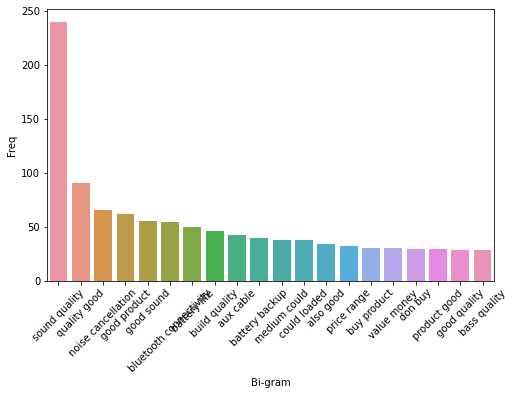

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [50]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [51]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

Tri-gram  Freq
0                        sound quality good    52
1                       medium could loaded    38
2                        good sound quality    31
3                         the sound quality    17
4                          boat rockerz 370    12
5                     product sound quality    10
6                        sound quality bass    10
7                          the medium could     9
8            quality bluetooth connectivity     9
9                         good battery life     8
10                    sound quality awesome     8
11                        ear start paining     7
12                       sound quality also     7
13                  good noise cancellation     7
14                     overall good product     7
15                  headphone sound quality     7
16                      great sound quality     7
17                        bass quality good     7
18                  sound quality bluetooth     7
19                      good battery backup     6
20                         boat rockerz 450     6
21                        build quality bad     6
22                       sound quality poor     6
23                         quality good but     6
24                   good quality headphone     6
25               quality noise cancellation     6
26                       broke within month     6
27                  noise cancellation also     6
28                        battery life good     6
29                  productthe medium could     6
30                    customer care service     5
31                  bass noise cancellation     5
32                           bass also good     5
33                            use long time     5
34                       sound bass quality     5
35              bluetooth connectivity good     5
36                      battery backup good     5
37                               do not buy     5
38                         it sound quality     5
39                      battery backup also     5
40                        sound quality bad     5
41                        very good product     5
42                      product price range     5
43                         good price range     5
44                     poor quality product     5
45                      sound quality noise     5
46                            can wear long     5
47                      best headphone ever     5
48                       nice sound quality     5
49                              the ear cup     4
50                       build quality good     4
51                          using aux cable     4
52                    awesome sound quality     4
53                    headphone price range     4
54                      bought online class     4
55                        battery life also     4
56                    average sound quality     4
57                        bad build quality     4
58                        but build quality     4
59                         sound quality is     4
60               product noise cancellation     4
61                     return window closed     4
62                           ear start pain     4
63               the bluetooth connectivity     4
64                            also good but     4
65                      sound quality great     4
66                       quality good price     4
67              bluetooth connectivity also     4
68                    amazing sound quality     4
69                        quality good bass     4
70                     sound quality pretty     4
71                    sound quality amazing     4
72                     long lasting battery     4
73                      build quality cheap     4
74                    quality cheap plastic     4
75                        quality also good     4
76                         must buy product     4
77                           it value money     4
78                       product good price     4
79                     sound qualit

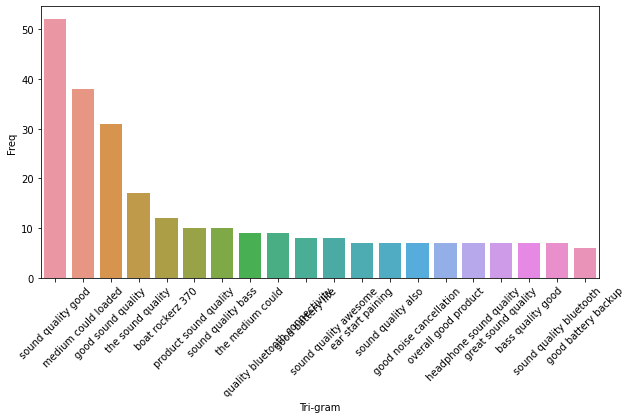

In [52]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [53]:
import string 
import re #regular expression
import spacy

In [54]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [55]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['buy', 'product', 'product', 'amazonit', 'say', 'hr', 'use', 'watch', 'base', 'kingthe', 'base', 'head', 'phone', 'plastic', 'band', 'broken', 'pr', 'plastic', 'product', 'distorte', 'value', 'crystal', 'clearbass', 'broken', 'month!!!i', 'fan', 'boat', 'purc', 'buy', 'bass', 'go', 'used', 'month', 'headphone', 'month', 'product', 'recieved', 'used', 'product', 'br', 'go', 'boat', 'product', 'month', 'value', 'money', 'productnice', 'buy', 'product', 'using', 'writing', 'review', 'medium', 'loaded', 'soundboat', 'rocker', 'headphones', 'broke', 'month', 'return', 'warranty', 'periodprod', 'price', 'productno', 'voice', 'cancellation', 'head', 'stared', 'paining', 'consi', 'start', 'sound', 'batt', 'goodafter', 'reading', 'review', 'people', 'mind', 'blowing', 'product', 'wish', 'give', 'problem', 'headphone', 'term', 'audio', 'quality', 'crystal', 'definit', 'quality', 'build', 'quality', 'poor!sou', 'ergonomicsbought', 'month', 'ago.works', 'bluetooth', 'quality', 'doubt', 'purchase'

In [56]:

len(nouns_verbs)

3118

In [57]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

words  count
0                    product    244
1                    quality    219
2                      sound     94
3                  headphone     90
4                        buy     61
5                      price     53
6                      month     34
7                      value     33
8                       boat     33
9                       bass     33
10                   battery     30
11                      good     30
12                       use     29
13                     using     29
14                    medium     29
15                       ear     29
16                        go     27
17                 bluetooth     27
18                   working     25
19                     money     24
20                    broken     23
21                    loaded     23
22                    bought     19
23                     thing     19
24                     noise     17
25                      used     16
26                      head     15
27                     build     15
28                    review     14
29                    return     14
30                     waste     14
31                   headset     13
32                      life     13
33                   plastic     12
34                      love     12
35                     music     11
36                       day     11
37                       get     11
38                  material     11
39                     phone     10
40              cancellation     10
41                      week     10
42                    budget     10
43                    design     10
44                     range     10
45                      work     10
46                  goodgood     10
47                     broke      9
48                   problem      9
49                     class      9
50                       got      9
51                   looking      9
52                      side      9
53                       qua      9
54                       pad      8
55                  producti      8
56                      time      8
57                     loved      8
58                     liked      8
59              connectivity      8
60                headphones      7
61                     audio      7
62                  purchase      7
63                        co      7
64                microphone      7
65                      look      7
66                     built      7
67                      want      7
68                      wear      7
69               performance      7
70                     voice      6
71                      hear      6
72                   ordered      6
73                      need      6
74                      hurt      6
75                     issue      6
76                   comfort      6
77                      come      5
78                     piece      5
79                   rockerz      5
80                   damaged      5
81                       goo      5
82                        it      5
83                  expected      5
84                      made      5
85                  headphon      5
86                      feel      5
87                   cushion      5
88                  wireless      5
89                   feature      5
90                    backup      5
91                      item      5
92               productgood      5
93                   connect      5
94                experience      5
95                 packaging      5
96                     produ      5
97                    qualit      5
98                      band      4
99                        pr      4
100                  writing      4
101                   rocker      4
102                 warranty      4
103                    start      4
104                     give      4
105                     wire      4
106                    going      4
107                  goodthe      4
108                   colour      4
109                    brand      4
110                  gettin

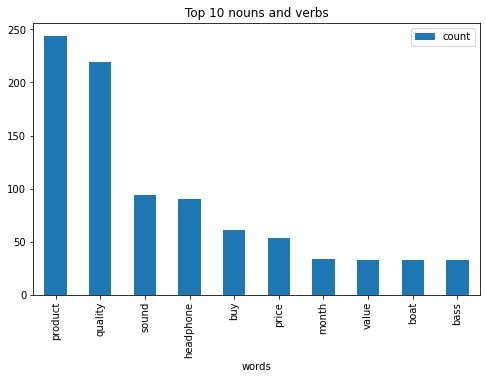

In [58]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [59]:
from PIL import Image

<Figure size 432x288 with 0 Axes>

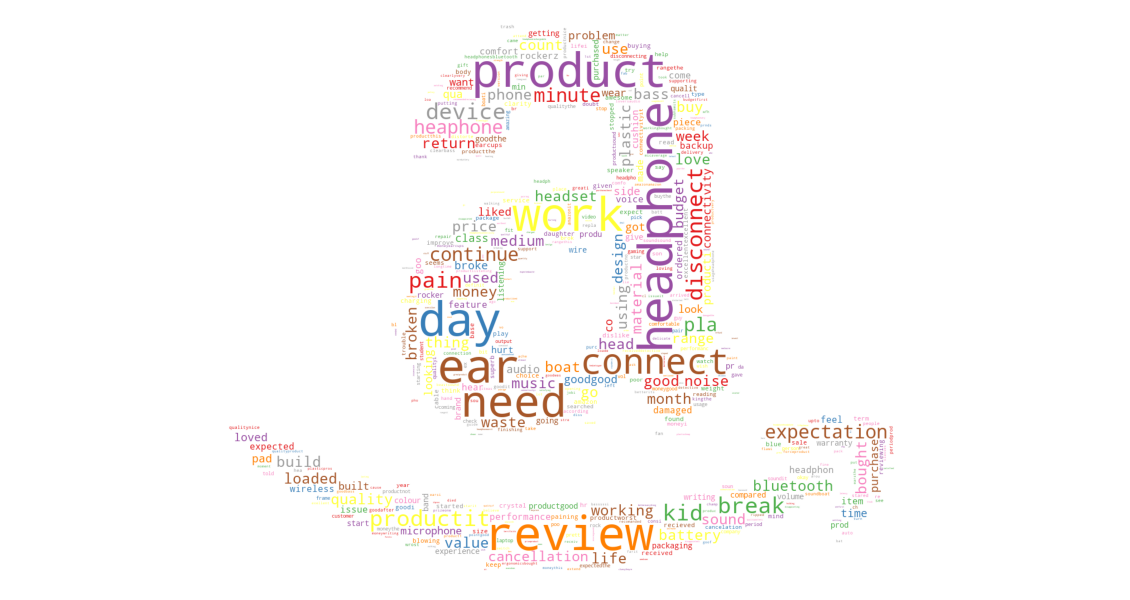

In [60]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
mask = np.array(Image.open("D:\\DATA SCIENCE\\Project\\Sentiment Analysis on Amazon Product Reviews\\amazon-icon-6.png"))
wordcloud = WordCloud(width=10000,height=5000,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

## Sentiment Analysis for each word

In [61]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

words  sentiment
0                    product   0.000000
1                    quality   0.000000
2                      sound   0.400000
3                  headphone   0.000000
4                        buy   0.000000
5                      price   0.000000
6                      month   0.000000
7                      value   0.000000
8                       boat   0.000000
9                       bass  -0.150000
10                   battery   0.000000
11                      good   0.700000
12                       use   0.000000
13                     using   0.000000
14                    medium   0.000000
15                       ear   0.000000
16                        go   0.000000
17                 bluetooth   0.000000
18                   working   0.000000
19                     money   0.000000
20                    broken  -0.400000
21                    loaded   0.000000
22                    bought   0.000000
23                     thing   0.000000
24                     noise   0.000000
25                      used   0.000000
26                      head   0.000000
27                     build   0.000000
28                    review   0.000000
29                    return   0.000000
30                     waste  -0.200000
31                   headset   0.000000
32                      life   0.000000
33                   plastic   0.000000
34                      love   0.500000
35                     music   0.000000
36                       day   0.000000
37                       get   0.000000
38                  material   0.000000
39                     phone   0.000000
40              cancellation   0.000000
41                      week   0.000000
42                    budget   0.000000
43                    design   0.000000
44                     range   0.000000
45                      work   0.000000
46                  goodgood   0.000000
47                     broke   0.000000
48                   problem   0.000000
49                     class   0.000000
50                       got   0.000000
51                   looking   0.000000
52                      side   0.000000
53                       qua   0.000000
54                       pad   0.000000
55                  producti   0.000000
56                      time   0.000000
57                     loved   0.700000
58                     liked   0.600000
59              connectivity   0.000000
60                headphones   0.000000
61                     audio   0.000000
62                  purchase   0.000000
63                        co   0.000000
64                microphone   0.000000
65                      look   0.000000
66                     built   0.000000
67                      want   0.000000
68                      wear   0.000000
69               performance   0.000000
70                     voice   0.000000
71                      hear   0.000000
72                   ordered   0.000000
73                      need   0.000000
74                      hurt   0.000000
75                     issue   0.000000
76                   comfort   0.000000
77                      come   0.000000
78                     piece   0.000000
79                   rockerz   0.000000
80                   damaged   0.000000
81                       goo   0.000000
82                        it   0.000000
83                  expected  -0.100000
84                      made   0.000000
85                  headphon   0.000000
86                      feel   0.000000
87                   cushion   0.000000
88                  wireless   0.000000
89                   feature   0.000000
90                    backup   0.000000
91                      item   0.000000
92               productgood   0.000000
93                   connect   0.000000
94                experience   0.000000
95                 packaging   0.000000
96                     produ   0.000000
97                    qualit   0.000000
98                      band   0.000000
99                     

In [62]:
#  subjectivity and polarity 
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [63]:
wd_df

words  count  sentiment  Subjectivity  Polarity
0                    product    244   0.000000      0.000000  0.000000
1                    quality    219   0.000000      0.000000  0.000000
2                      sound     94   0.400000      0.400000  0.400000
3                  headphone     90   0.000000      0.000000  0.000000
4                        buy     61   0.000000      0.000000  0.000000
5                      price     53   0.000000      0.000000  0.000000
6                      month     34   0.000000      0.000000  0.000000
7                      value     33   0.000000      0.000000  0.000000
8                       boat     33   0.000000      0.000000  0.000000
9                       bass     33  -0.150000      0.500000 -0.150000
10                   battery     30   0.000000      0.000000  0.000000
11                      good     30   0.700000      0.600000  0.700000
12                       use     29   0.000000      0.000000  0.000000
13                     using     29   0.000000      0.000000  0.000000
14                    medium     29   0.000000      0.000000  0.000000
15                       ear     29   0.000000      0.000000  0.000000
16                        go     27   0.000000      0.000000  0.000000
17                 bluetooth     27   0.000000      0.000000  0.000000
18                   working     25   0.000000      0.000000  0.000000
19                     money     24   0.000000      0.000000  0.000000
20                    broken     23  -0.400000      0.400000 -0.400000
21                    loaded     23   0.000000      0.000000  0.000000
22                    bought     19   0.000000      0.000000  0.000000
23                     thing     19   0.000000      0.000000  0.000000
24                     noise     17   0.000000      0.000000  0.000000
25                      used     16   0.000000      0.000000  0.000000
26                      head     15   0.000000      0.000000  0.000000
27                     build     15   0.000000      0.000000  0.000000
28                    review     14   0.000000      0.000000  0.000000
29                    return     14   0.000000      0.000000  0.000000
30                     waste     14  -0.200000      0.000000 -0.200000
31                   headset     13   0.000000      0.000000  0.000000
32                      life     13   0.000000      0.000000  0.000000
33                   plastic     12   0.000000      0.000000  0.000000
34                      love     12   0.500000      0.600000  0.500000
35                     music     11   0.000000      0.000000  0.000000
36                       day     11   0.000000      0.000000  0.000000
37                       get     11   0.000000      0.000000  0.000000
38                  material     11   0.000000      0.000000  0.000000
39                     phone     10   0.000000      0.000000  0.000000
40              cancellation     10   0.000000      0.000000  0.000000
41                      week     10   0.000000      0.000000  0.000000
42                    budget     10   0.000000      0.000000  0.000000
43                    design     10   0.000000      0.000000  0.000000
44                     range     10   0.000000      0.000000  0.000000
45                      work     10   0.000000      0.000000  0.000000
46                  goodgood     10   0.000000      0.000000  0.000000
47                     broke      9   0.000000      0.000000  0.000000
48                   problem      9   0.000000      0.000000  0.000000
49                     class      9   0.000000      0.000000  0.000000
50                       got      9   0.000000      0.000000  0.000000
51                   looking      9   0.000000      0.000000  0.000000
52                      side      9   0.000000      0.000000  0.000000
53                       qua      9   0.000000      0.000000  0.000000
54                       pad      8   0.000000      0.000000  0.000000
55                  producti      8   0.000000 

In [64]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [65]:
wd_df

words  count  sentiment  Subjectivity  Polarity  \
0                    product    244   0.000000      0.000000  0.000000   
1                    quality    219   0.000000      0.000000  0.000000   
2                      sound     94   0.400000      0.400000  0.400000   
3                  headphone     90   0.000000      0.000000  0.000000   
4                        buy     61   0.000000      0.000000  0.000000   
5                      price     53   0.000000      0.000000  0.000000   
6                      month     34   0.000000      0.000000  0.000000   
7                      value     33   0.000000      0.000000  0.000000   
8                       boat     33   0.000000      0.000000  0.000000   
9                       bass     33  -0.150000      0.500000 -0.150000   
10                   battery     30   0.000000      0.000000  0.000000   
11                      good     30   0.700000      0.600000  0.700000   
12                       use     29   0.000000      0.000000  0.000000   
13                     using     29   0.000000      0.000000  0.000000   
14                    medium     29   0.000000      0.000000  0.000000   
15                       ear     29   0.000000      0.000000  0.000000   
16                        go     27   0.000000      0.000000  0.000000   
17                 bluetooth     27   0.000000      0.000000  0.000000   
18                   working     25   0.000000      0.000000  0.000000   
19                     money     24   0.000000      0.000000  0.000000   
20                    broken     23  -0.400000      0.400000 -0.400000   
21                    loaded     23   0.000000      0.000000  0.000000   
22                    bought     19   0.000000      0.000000  0.000000   
23                     thing     19   0.000000      0.000000  0.000000   
24                     noise     17   0.000000      0.000000  0.000000   
25                      used     16   0.000000      0.000000  0.000000   
26                      head     15   0.000000      0.000000  0.000000   
27                     build     15   0.000000      0.000000  0.000000   
28                    review     14   0.000000      0.000000  0.000000   
29                    return     14   0.000000      0.000000  0.000000   
30                     waste     14  -0.200000      0.000000 -0.200000   
31                   headset     13   0.000000      0.000000  0.000000   
32                      life     13   0.000000      0.000000  0.000000   
33                   plastic     12   0.000000      0.000000  0.000000   
34                      love     12   0.500000      0.600000  0.500000   
35                     music     11   0.000000      0.000000  0.000000   
36                       day     11   0.000000      0.000000  0.000000   
37                       get     11   0.000000      0.000000  0.000000   
38                  material     11   0.000000      0.000000  0.000000   
39                     phone     10   0.000000      0.000000  0.000000   
40              cancellation     10   0.000000      0.000000  0.000000   
41                      week     10   0.000000      0.000000  0.000000   
42                    budget     10   0.000000      0.000000  0.000000   
43                    design     10   0.000000      0.000000  0.000000   
44                     range     10   0.000000      0.000000  0.000000   
45                      work     10   0.000000      0.000000  0.000000   
46                  goodgood     10   0.000000      0.000000  0.000000   
47                     broke      9   0.000000      0.000000  0.000000   
48                   problem      9   0.000000      0.000000  0.000000   
49                     class      9   0.000000      0.000000  0.000000   
50                       got      9   0.000000      0.000000  0.000000   
51                   looking      9   0.000000      0.000000  0.000000   
52                      side      9   0.000000      0.000000  0.000000   
53                       qu

In [66]:
wd_df['Analysis'].count

<bound method Series.count of 0        Neutral
1        Neutral
2       Positive
3        Neutral
4        Neutral
5        Neutral
6        Neutral
7        Neutral
8        Neutral
9       Negative
10       Neutral
11      Positive
12       Neutral
13       Neutral
14       Neutral
15       Neutral
16       Neutral
17       Neutral
18       Neutral
19       Neutral
20      Negative
21       Neutral
22       Neutral
23       Neutral
24       Neutral
25       Neutral
26       Neutral
27       Neutral
28       Neutral
29       Neutral
30      Negative
31       Neutral
32       Neutral
33       Neutral
34      Positive
35       Neutral
36       Neutral
37       Neutral
38       Neutral
39       Neutral
40       Neutral
41       Neutral
42       Neutral
43       Neutral
44       Neutral
45       Neutral
46       Neutral
47       Neutral
48       Neutral
49       Neutral
50       Neutral
51       Neutral
52       Neutral
53       Neutral
54       Neutral
55       Neutral
56       Neutral
5

<AxesSubplot:>

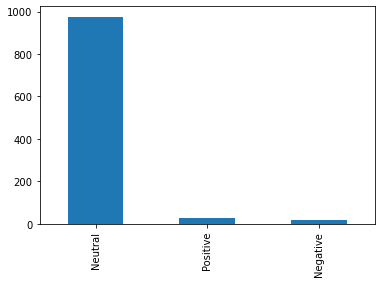

In [67]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [68]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                   (0.8, 1.0)
1                            (0.25125, 0.5925)
2                   (0.07999999999999996, 0.8)
3                                  (-0.4, 0.4)
4    (0.21721428571428567, 0.5209404761904762)
Name: reviews, dtype: object

In [69]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

reviews     sentiment
0              i happy buy product...nice product.....  8.000000e-01
1    amazingly amazonit say 8 hr since i use watch ...  2.512500e-01
2    base kingthe base really good. value range mon...  8.000000e-02
3    the head phone plastic band broken out.this pr... -4.000000e-01
4    cheap plastic, average product. sound distorte...  2.172143e-01
5    value moneysound crystal clearbass pretty good...  2.500000e-01
6    broken within one month!!!i huge fan boat purc... -1.166667e-01
7    don't buy please...bass disgusting... range go... -1.500000e-01
8    cheap qualityi used 1 month headphone literall...  1.114583e-01
9    after 2 month reviewmarvelous performanceif wa...  3.562500e-01
10   product great recieved used product instead br...  1.642857e-01
11   never go boat product againdidn't last month..... -7.142857e-02
12                             value money productnice  0.000000e+00
13   worst products.plz buy product.. using half ho... -5.833333e-01
14   perfect! free worrieswell i writing review 6 m...  3.921667e-01
15   amazing (bt) headphonesthe medium could loaded...  2.799242e-01
16   very nice soundboat rocker 310 perhaps best so...  5.216667e-01
17   useless headphones.poor basic headphones. high... -7.738095e-03
18   broke 3 month won’t return warranty periodprod... -1.000000e-01
19   not worth price productno voice cancellation p...  1.932692e-01
20   not goodmy ear head stared paining. it's uncom...  1.125000e-01
21   pro consi would like start pro sound good batt...  3.500000e-01
22   it's goodafter reading review people really li...  2.506579e-01
23                          ok supersuper mind blowing  5.000000e-01
24   bad product i wish i could give 0 star itthis ... -1.593750e-01
25   problem itthe headphone kinda good term audio ...  5.000000e-01
26   sound quality crystal clear [hd] (high definit...  2.432917e-01
27   sound quality is great, build quality poor!sou...  2.362500e-01
28   poor ergonomicsbought almost 4 month ago.works...  2.877976e-01
29   bluetooth connectivitysound quality doubt good...  9.431818e-02
30   disappointed ,duplicate productdon’t purchase ...  2.500000e-02
31   battery lifei using earphone 4 month now, sure...  2.250000e-01
32   best price(999)i bought attend online class co...  5.187500e-01
33   just okay. not great.this product okay great.i...  1.750000e-01
34   noise cancellation?? my son can't hear me when...  3.979167e-01
35   just above average product.for price 1100 blue...  1.722222e-01
36   uncomfortable, pain earsi using headphone last...  8.428571e-02
37   it works• good sound quality, vocal crystal cl...  2.434066e-01
38   what stupid waste moneyi can't believe experie... -2.208333e-01
39   not worth itwas working fine 1st week. started... -4.032738e-02
40   technical issueit's 2 month since i'm using pr... -4.375000e-02
41   average headphone good mic qualityhey purchase...  2.575000e-01
42   a decent product reasonable price!first all, h...  2.368056e-01
43   it cheap version high price.the product come g...  1.075758e-02
44   balanced sound longtime ache ear cause cufs ki...  2.517678e-01
45   good product price rangethe medium could loade...  2.916667e-01
46   cheap plastic, average product. broken within ... -1.705128e-01
47   bad mic , mic is not workingbought on 29 may 2... -7.000000e-01
48   only bass goodbass n sound quality good. but m...  1.187500e-01
49   above average...this headphone good non-bass l...  3.250000e-01
50   cristal clear sound, stylish perfect moment li...  4.867708e-01
51   great product excellent service amazonamazon d...  4.517857e-01
52   exellent, must buy lot good qualitythis brilli...  2.835799e-01
53   excellent head phone great value moneythis par...  4.886905e-01
54   good sound quality poor quality plasticpros-so...  2.766667e-01
55   single subhamits cool, stylish, high quality h...  3.877143e-01
56   good betterits fragile.. wire come try extend ...  2.719697e-01
57   trouble bluetooth connectivityit seems p

## Subjectivity and Polarity 

In [70]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [71]:
amazon

rating                                            reviews     sentiment  \
0      5.0            i happy buy product...nice product.....  8.000000e-01   
1      4.0  amazingly amazonit say 8 hr since i use watch ...  2.512500e-01   
2      4.0  base kingthe base really good. value range mon...  8.000000e-02   
3      1.0  the head phone plastic band broken out.this pr... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value moneysound crystal clearbass pretty good...  2.500000e-01   
6      1.0  broken within one month!!!i huge fan boat purc... -1.166667e-01   
7      1.0  don't buy please...bass disgusting... range go... -1.500000e-01   
8      1.0  cheap qualityi used 1 month headphone literall...  1.114583e-01   
9      4.0  after 2 month reviewmarvelous performanceif wa...  3.562500e-01   
10     4.0  product great recieved used product instead br...  1.642857e-01   
11     1.0  never go boat product againdidn't last month..... -7.142857e-02   
12     4.0                            value money productnice  0.000000e+00   
13     1.0  worst products.plz buy product.. using half ho... -5.833333e-01   
14     5.0  perfect! free worrieswell i writing review 6 m...  3.921667e-01   
15     5.0  amazing (bt) headphonesthe medium could loaded...  2.799242e-01   
16     5.0  very nice soundboat rocker 310 perhaps best so...  5.216667e-01   
17     1.0  useless headphones.poor basic headphones. high... -7.738095e-03   
18     1.0  broke 3 month won’t return warranty periodprod... -1.000000e-01   
19     1.0  not worth price productno voice cancellation p...  1.932692e-01   
20     1.0  not goodmy ear head stared paining. it's uncom...  1.125000e-01   
21     4.0  pro consi would like start pro sound good batt...  3.500000e-01   
22     5.0  it's goodafter reading review people really li...  2.506579e-01   
23     5.0                         ok supersuper mind blowing  5.000000e-01   
24     2.0  bad product i wish i could give 0 star itthis ... -1.593750e-01   
25     2.0  problem itthe headphone kinda good term audio ...  5.000000e-01   
26     5.0  sound quality crystal clear [hd] (high definit...  2.432917e-01   
27     3.0  sound quality is great, build quality poor!sou...  2.362500e-01   
28     2.0  poor ergonomicsbought almost 4 month ago.works...  2.877976e-01   
29     4.0  bluetooth connectivitysound quality doubt good...  9.431818e-02   
30     1.0  disappointed ,duplicate productdon’t purchase ...  2.500000e-02   
31     5.0  battery lifei using earphone 4 month now, sure...  2.250000e-01   
32     5.0  best price(999)i bought attend online class co...  5.187500e-01   
33     1.0  just okay. not great.this product okay great.i...  1.750000e-01   
34     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
35     4.0  just above average product.for price 1100 blue...  1.722222e-01   
36     3.0  uncomfortable, pain earsi using headphone last...  8.428571e-02   
37     5.0  it works• good sound quality, vocal crystal cl...  2.434066e-01   
38     1.0  what stupid waste moneyi can't believe experie... -2.208333e-01   
39     1.0  not worth itwas working fine 1st week. started... -4.032738e-02   
40     1.0  technical issueit's 2 month since i'm using pr... -4.375000e-02   
41     4.0  average headphone good mic qualityhey purchase...  2.575000e-01   
42     5.0  a decent product reasonable price!first all, h...  2.368056e-01   
43     2.0  it cheap version high price.the product come g...  1.075758e-02   
44     3.0  balanced sound longtime ache ear cause cufs ki...  2.517678e-01   
45     3.0  good product price rangethe medium could loade...  2.916667e-01   
46     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
47     1.0  bad mic , mic is not workingbought on 29 may 2... -7.000000e-01   
48     3.0  only bass goodbass n sound quality good. but m...  1.187500e-01   
49     4.0  above average...this headphone good non-ba

In [72]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [73]:
amazon

rating                                            reviews     sentiment  \
0      5.0            i happy buy product...nice product.....  8.000000e-01   
1      4.0  amazingly amazonit say 8 hr since i use watch ...  2.512500e-01   
2      4.0  base kingthe base really good. value range mon...  8.000000e-02   
3      1.0  the head phone plastic band broken out.this pr... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value moneysound crystal clearbass pretty good...  2.500000e-01   
6      1.0  broken within one month!!!i huge fan boat purc... -1.166667e-01   
7      1.0  don't buy please...bass disgusting... range go... -1.500000e-01   
8      1.0  cheap qualityi used 1 month headphone literall...  1.114583e-01   
9      4.0  after 2 month reviewmarvelous performanceif wa...  3.562500e-01   
10     4.0  product great recieved used product instead br...  1.642857e-01   
11     1.0  never go boat product againdidn't last month..... -7.142857e-02   
12     4.0                            value money productnice  0.000000e+00   
13     1.0  worst products.plz buy product.. using half ho... -5.833333e-01   
14     5.0  perfect! free worrieswell i writing review 6 m...  3.921667e-01   
15     5.0  amazing (bt) headphonesthe medium could loaded...  2.799242e-01   
16     5.0  very nice soundboat rocker 310 perhaps best so...  5.216667e-01   
17     1.0  useless headphones.poor basic headphones. high... -7.738095e-03   
18     1.0  broke 3 month won’t return warranty periodprod... -1.000000e-01   
19     1.0  not worth price productno voice cancellation p...  1.932692e-01   
20     1.0  not goodmy ear head stared paining. it's uncom...  1.125000e-01   
21     4.0  pro consi would like start pro sound good batt...  3.500000e-01   
22     5.0  it's goodafter reading review people really li...  2.506579e-01   
23     5.0                         ok supersuper mind blowing  5.000000e-01   
24     2.0  bad product i wish i could give 0 star itthis ... -1.593750e-01   
25     2.0  problem itthe headphone kinda good term audio ...  5.000000e-01   
26     5.0  sound quality crystal clear [hd] (high definit...  2.432917e-01   
27     3.0  sound quality is great, build quality poor!sou...  2.362500e-01   
28     2.0  poor ergonomicsbought almost 4 month ago.works...  2.877976e-01   
29     4.0  bluetooth connectivitysound quality doubt good...  9.431818e-02   
30     1.0  disappointed ,duplicate productdon’t purchase ...  2.500000e-02   
31     5.0  battery lifei using earphone 4 month now, sure...  2.250000e-01   
32     5.0  best price(999)i bought attend online class co...  5.187500e-01   
33     1.0  just okay. not great.this product okay great.i...  1.750000e-01   
34     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
35     4.0  just above average product.for price 1100 blue...  1.722222e-01   
36     3.0  uncomfortable, pain earsi using headphone last...  8.428571e-02   
37     5.0  it works• good sound quality, vocal crystal cl...  2.434066e-01   
38     1.0  what stupid waste moneyi can't believe experie... -2.208333e-01   
39     1.0  not worth itwas working fine 1st week. started... -4.032738e-02   
40     1.0  technical issueit's 2 month since i'm using pr... -4.375000e-02   
41     4.0  average headphone good mic qualityhey purchase...  2.575000e-01   
42     5.0  a decent product reasonable price!first all, h...  2.368056e-01   
43     2.0  it cheap version high price.the product come g...  1.075758e-02   
44     3.0  balanced sound longtime ache ear cause cufs ki...  2.517678e-01   
45     3.0  good product price rangethe medium could loade...  2.916667e-01   
46     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
47     1.0  bad mic , mic is not workingbought on 29 may 2... -7.000000e-01   
48     3.0  only bass goodbass n sound quality good. but m...  1.187500e-01   
49     4.0  above average...this headphone good non-ba

<AxesSubplot:>

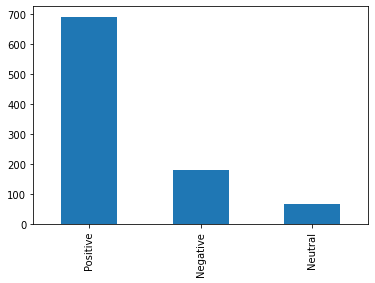

In [74]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [75]:
amazon

rating                                            reviews     sentiment  \
0      5.0            i happy buy product...nice product.....  8.000000e-01   
1      4.0  amazingly amazonit say 8 hr since i use watch ...  2.512500e-01   
2      4.0  base kingthe base really good. value range mon...  8.000000e-02   
3      1.0  the head phone plastic band broken out.this pr... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value moneysound crystal clearbass pretty good...  2.500000e-01   
6      1.0  broken within one month!!!i huge fan boat purc... -1.166667e-01   
7      1.0  don't buy please...bass disgusting... range go... -1.500000e-01   
8      1.0  cheap qualityi used 1 month headphone literall...  1.114583e-01   
9      4.0  after 2 month reviewmarvelous performanceif wa...  3.562500e-01   
10     4.0  product great recieved used product instead br...  1.642857e-01   
11     1.0  never go boat product againdidn't last month..... -7.142857e-02   
12     4.0                            value money productnice  0.000000e+00   
13     1.0  worst products.plz buy product.. using half ho... -5.833333e-01   
14     5.0  perfect! free worrieswell i writing review 6 m...  3.921667e-01   
15     5.0  amazing (bt) headphonesthe medium could loaded...  2.799242e-01   
16     5.0  very nice soundboat rocker 310 perhaps best so...  5.216667e-01   
17     1.0  useless headphones.poor basic headphones. high... -7.738095e-03   
18     1.0  broke 3 month won’t return warranty periodprod... -1.000000e-01   
19     1.0  not worth price productno voice cancellation p...  1.932692e-01   
20     1.0  not goodmy ear head stared paining. it's uncom...  1.125000e-01   
21     4.0  pro consi would like start pro sound good batt...  3.500000e-01   
22     5.0  it's goodafter reading review people really li...  2.506579e-01   
23     5.0                         ok supersuper mind blowing  5.000000e-01   
24     2.0  bad product i wish i could give 0 star itthis ... -1.593750e-01   
25     2.0  problem itthe headphone kinda good term audio ...  5.000000e-01   
26     5.0  sound quality crystal clear [hd] (high definit...  2.432917e-01   
27     3.0  sound quality is great, build quality poor!sou...  2.362500e-01   
28     2.0  poor ergonomicsbought almost 4 month ago.works...  2.877976e-01   
29     4.0  bluetooth connectivitysound quality doubt good...  9.431818e-02   
30     1.0  disappointed ,duplicate productdon’t purchase ...  2.500000e-02   
31     5.0  battery lifei using earphone 4 month now, sure...  2.250000e-01   
32     5.0  best price(999)i bought attend online class co...  5.187500e-01   
33     1.0  just okay. not great.this product okay great.i...  1.750000e-01   
34     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
35     4.0  just above average product.for price 1100 blue...  1.722222e-01   
36     3.0  uncomfortable, pain earsi using headphone last...  8.428571e-02   
37     5.0  it works• good sound quality, vocal crystal cl...  2.434066e-01   
38     1.0  what stupid waste moneyi can't believe experie... -2.208333e-01   
39     1.0  not worth itwas working fine 1st week. started... -4.032738e-02   
40     1.0  technical issueit's 2 month since i'm using pr... -4.375000e-02   
41     4.0  average headphone good mic qualityhey purchase...  2.575000e-01   
42     5.0  a decent product reasonable price!first all, h...  2.368056e-01   
43     2.0  it cheap version high price.the product come g...  1.075758e-02   
44     3.0  balanced sound longtime ache ear cause cufs ki...  2.517678e-01   
45     3.0  good product price rangethe medium could loade...  2.916667e-01   
46     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
47     1.0  bad mic , mic is not workingbought on 29 may 2... -7.000000e-01   
48     3.0  only bass goodbass n sound quality good. but m...  1.187500e-01   
49     4.0  above average...this headphone good non-ba

## Generate Positive Reviews Word Cloud

In [76]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [77]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

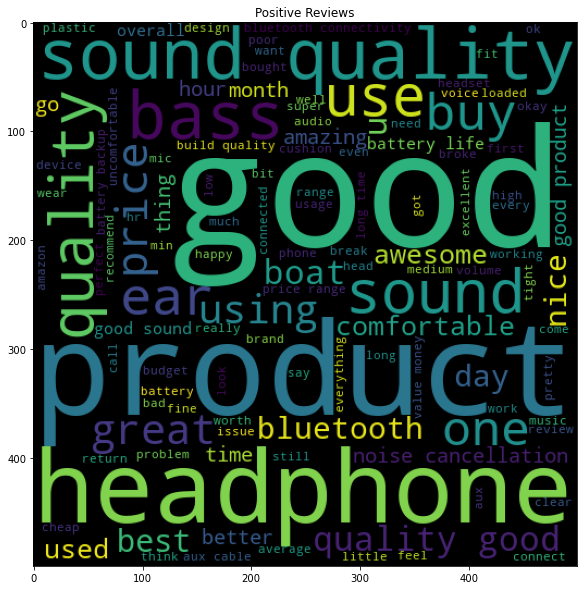

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [79]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

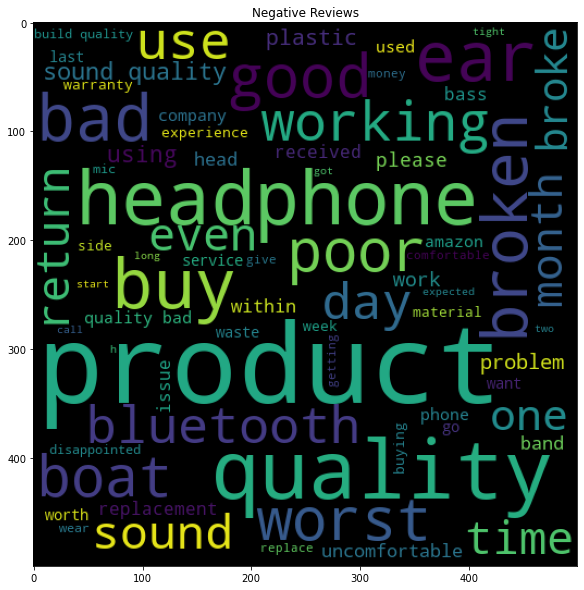

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [81]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

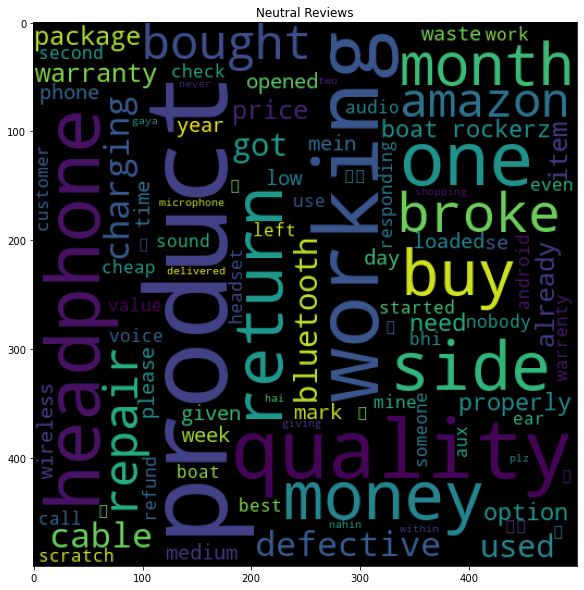

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building 

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [84]:
x=vectorizer.fit_transform(amazon['reviews'])

In [85]:
#rows, reviews
x.shape

(940, 3554)

### LabelEncoder for classification Model

In [86]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [87]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

rating                                            reviews     sentiment  \
0      5.0            i happy buy product...nice product.....  8.000000e-01   
1      4.0  amazingly amazonit say 8 hr since i use watch ...  2.512500e-01   
2      4.0  base kingthe base really good. value range mon...  8.000000e-02   
3      1.0  the head phone plastic band broken out.this pr... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value moneysound crystal clearbass pretty good...  2.500000e-01   
6      1.0  broken within one month!!!i huge fan boat purc... -1.166667e-01   
7      1.0  don't buy please...bass disgusting... range go... -1.500000e-01   
8      1.0  cheap qualityi used 1 month headphone literall...  1.114583e-01   
9      4.0  after 2 month reviewmarvelous performanceif wa...  3.562500e-01   
10     4.0  product great recieved used product instead br...  1.642857e-01   
11     1.0  never go boat product againdidn't last month..... -7.142857e-02   
12     4.0                            value money productnice  0.000000e+00   
13     1.0  worst products.plz buy product.. using half ho... -5.833333e-01   
14     5.0  perfect! free worrieswell i writing review 6 m...  3.921667e-01   
15     5.0  amazing (bt) headphonesthe medium could loaded...  2.799242e-01   
16     5.0  very nice soundboat rocker 310 perhaps best so...  5.216667e-01   
17     1.0  useless headphones.poor basic headphones. high... -7.738095e-03   
18     1.0  broke 3 month won’t return warranty periodprod... -1.000000e-01   
19     1.0  not worth price productno voice cancellation p...  1.932692e-01   
20     1.0  not goodmy ear head stared paining. it's uncom...  1.125000e-01   
21     4.0  pro consi would like start pro sound good batt...  3.500000e-01   
22     5.0  it's goodafter reading review people really li...  2.506579e-01   
23     5.0                         ok supersuper mind blowing  5.000000e-01   
24     2.0  bad product i wish i could give 0 star itthis ... -1.593750e-01   
25     2.0  problem itthe headphone kinda good term audio ...  5.000000e-01   
26     5.0  sound quality crystal clear [hd] (high definit...  2.432917e-01   
27     3.0  sound quality is great, build quality poor!sou...  2.362500e-01   
28     2.0  poor ergonomicsbought almost 4 month ago.works...  2.877976e-01   
29     4.0  bluetooth connectivitysound quality doubt good...  9.431818e-02   
30     1.0  disappointed ,duplicate productdon’t purchase ...  2.500000e-02   
31     5.0  battery lifei using earphone 4 month now, sure...  2.250000e-01   
32     5.0  best price(999)i bought attend online class co...  5.187500e-01   
33     1.0  just okay. not great.this product okay great.i...  1.750000e-01   
34     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
35     4.0  just above average product.for price 1100 blue...  1.722222e-01   
36     3.0  uncomfortable, pain earsi using headphone last...  8.428571e-02   
37     5.0  it works• good sound quality, vocal crystal cl...  2.434066e-01   
38     1.0  what stupid waste moneyi can't believe experie... -2.208333e-01   
39     1.0  not worth itwas working fine 1st week. started... -4.032738e-02   
40     1.0  technical issueit's 2 month since i'm using pr... -4.375000e-02   
41     4.0  average headphone good mic qualityhey purchase...  2.575000e-01   
42     5.0  a decent product reasonable price!first all, h...  2.368056e-01   
43     2.0  it cheap version high price.the product come g...  1.075758e-02   
44     3.0  balanced sound longtime ache ear cause cufs ki...  2.517678e-01   
45     3.0  good product price rangethe medium could loade...  2.916667e-01   
46     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
47     1.0  bad mic , mic is not workingbought on 29 may 2... -7.000000e-01   
48     3.0  only bass goodbass n sound quality good. but m...  1.187500e-01   
49     4.0  above average...this headphone good non-ba

In [88]:
y_svc=amazon['target'].values
y_svc

array([2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,

In [89]:
from sklearn.model_selection import train_test_split   

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [91]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [92]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [93]:
gsv.best_params_ , gsv.best_score_ 

({'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8143557422969188)

In [94]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 78.72340425531915


array([[ 0,  0, 18],
       [ 0,  1,  2],
       [ 0,  0, 73]], dtype=int64)

# KNN

In [95]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [97]:
print(grid_search.best_params_)

{'n_neighbors': 29}


In [98]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 78.01%


In [99]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [100]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [101]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 82.97872340425532


# Bagging Boosting 

In [103]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [105]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

In [106]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  87.2340425531915


# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [108]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [109]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_ 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


0.7706855791962175

In [110]:
rf.predict(X_test)

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2])

In [111]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

2    80
0     8
1     6
dtype: int64

In [112]:
preds

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2])

In [113]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0  0  1   2
row_0          
0      7  1  10
1      0  3   0
2      1  2  70

In [114]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.851063829787234

In [115]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.39      0.88      0.54         8
           1       1.00      0.50      0.67         6
           2       0.96      0.88      0.92        80

    accuracy                           0.85        94
   macro avg       0.78      0.75      0.71        94
weighted avg       0.91      0.85      0.87        94



# XGBoost (Extreme Gradient Boosting)

In [116]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [117]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [118]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [119]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [120]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.23%


### XGBoost giving the best result, we can use it for deployment

In [121]:
amazon

rating                                            reviews     sentiment  \
0      5.0            i happy buy product...nice product.....  8.000000e-01   
1      4.0  amazingly amazonit say 8 hr since i use watch ...  2.512500e-01   
2      4.0  base kingthe base really good. value range mon...  8.000000e-02   
3      1.0  the head phone plastic band broken out.this pr... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value moneysound crystal clearbass pretty good...  2.500000e-01   
6      1.0  broken within one month!!!i huge fan boat purc... -1.166667e-01   
7      1.0  don't buy please...bass disgusting... range go... -1.500000e-01   
8      1.0  cheap qualityi used 1 month headphone literall...  1.114583e-01   
9      4.0  after 2 month reviewmarvelous performanceif wa...  3.562500e-01   
10     4.0  product great recieved used product instead br...  1.642857e-01   
11     1.0  never go boat product againdidn't last month..... -7.142857e-02   
12     4.0                            value money productnice  0.000000e+00   
13     1.0  worst products.plz buy product.. using half ho... -5.833333e-01   
14     5.0  perfect! free worrieswell i writing review 6 m...  3.921667e-01   
15     5.0  amazing (bt) headphonesthe medium could loaded...  2.799242e-01   
16     5.0  very nice soundboat rocker 310 perhaps best so...  5.216667e-01   
17     1.0  useless headphones.poor basic headphones. high... -7.738095e-03   
18     1.0  broke 3 month won’t return warranty periodprod... -1.000000e-01   
19     1.0  not worth price productno voice cancellation p...  1.932692e-01   
20     1.0  not goodmy ear head stared paining. it's uncom...  1.125000e-01   
21     4.0  pro consi would like start pro sound good batt...  3.500000e-01   
22     5.0  it's goodafter reading review people really li...  2.506579e-01   
23     5.0                         ok supersuper mind blowing  5.000000e-01   
24     2.0  bad product i wish i could give 0 star itthis ... -1.593750e-01   
25     2.0  problem itthe headphone kinda good term audio ...  5.000000e-01   
26     5.0  sound quality crystal clear [hd] (high definit...  2.432917e-01   
27     3.0  sound quality is great, build quality poor!sou...  2.362500e-01   
28     2.0  poor ergonomicsbought almost 4 month ago.works...  2.877976e-01   
29     4.0  bluetooth connectivitysound quality doubt good...  9.431818e-02   
30     1.0  disappointed ,duplicate productdon’t purchase ...  2.500000e-02   
31     5.0  battery lifei using earphone 4 month now, sure...  2.250000e-01   
32     5.0  best price(999)i bought attend online class co...  5.187500e-01   
33     1.0  just okay. not great.this product okay great.i...  1.750000e-01   
34     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
35     4.0  just above average product.for price 1100 blue...  1.722222e-01   
36     3.0  uncomfortable, pain earsi using headphone last...  8.428571e-02   
37     5.0  it works• good sound quality, vocal crystal cl...  2.434066e-01   
38     1.0  what stupid waste moneyi can't believe experie... -2.208333e-01   
39     1.0  not worth itwas working fine 1st week. started... -4.032738e-02   
40     1.0  technical issueit's 2 month since i'm using pr... -4.375000e-02   
41     4.0  average headphone good mic qualityhey purchase...  2.575000e-01   
42     5.0  a decent product reasonable price!first all, h...  2.368056e-01   
43     2.0  it cheap version high price.the product come g...  1.075758e-02   
44     3.0  balanced sound longtime ache ear cause cufs ki...  2.517678e-01   
45     3.0  good product price rangethe medium could loade...  2.916667e-01   
46     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
47     1.0  bad mic , mic is not workingbought on 29 may 2... -7.000000e-01   
48     3.0  only bass goodbass n sound quality good. but m...  1.187500e-01   
49     4.0  above average...this headphone good non-ba

In [125]:
import pickle 

In [126]:
#downloading pkl file in write binary format
pickle.dump(amazon,open('amazon_pkl.pkl','wb'))

In [127]:
amazon.to_csv(r'D:\DATA SCIENCE\Project\Sentiment Analysis on Amazon Product Reviews\amazon_final.csv', index=False)